In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/

Mounted at /content/drive
MyDrive


# Ner bert

In [ ]:
!pip install pandas
!pip install nltk
!pip install transformers
!pip install tqdm
!pip install spacy


In [ ]:
import pandas as pd
import nltk
from tqdm import tqdm
from transformers import BertTokenizer, BertForTokenClassification, BertConfig
from transformers import pipeline
import ast
import spacy
from collections import Counter

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


In [ ]:
import pandas as pd
import ast
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')

# Load relevant sentences associated with entities
path_to_relevant_sentences = '/content/drive/MyDrive/Colab Notebooks/relevant_sentences_expanded.csv'
df_relevant_sentences = pd.read_csv(path_to_relevant_sentences)

# Initialize VADER SentimentIntensityAnalyzer
sia = SIA()

# Function to calculate sentiment for each sentence
def calculate_sentiment(sentence):
    pol_score = sia.polarity_scores(sentence)
    return pol_score['compound'], pol_score['pos'], pol_score['neg'], pol_score['neu']

# Apply sentiment analysis to each sentence
sentiment_scores = df_relevant_sentences['Sentence'].apply(calculate_sentiment)
df_relevant_sentences[['Compound', 'Positive', 'Negative', 'Neutral']] = pd.DataFrame(sentiment_scores.tolist())

# Display the updated DataFrame with sentiment scores
print(df_relevant_sentences.head())

# Aggregate sentiment scores by Entity and Year
aggregate_sentiment = df_relevant_sentences.groupby(['Entity', 'Dominant Topic']).agg({ # Entity,
    'Compound': 'mean',
    'Positive': 'mean',
    'Negative': 'mean',
    'Neutral': 'mean'
}).reset_index()

# Display aggregated sentiment scores
print(aggregate_sentiment.head())

# Normalize sentiment scores between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))
columns_to_normalize = ['Compound', 'Positive', 'Negative']
aggregate_sentiment[columns_to_normalize] = scaler.fit_transform(aggregate_sentiment[columns_to_normalize])

# Plot aggregate sentiment scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Entity', y='Compound', hue='Dominant Topic', data=aggregate_sentiment)
plt.title('Aggregate Sentiment Analysis by Entity and Dominant Topic')
plt.xlabel('Entity')
plt.ylabel('Normalized Compound Sentiment')
plt.xticks(rotation=45)
plt.legend(title='Dominant Topic')
plt.tight_layout()
plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                            Sentence Entity  \
0  Environmental groups rejected the dominance of...  Eskom   
1  The problem of relying upon these actors to sa...  Eskom   
2  The problem of relying upon these actors to sa...    ANC   
3  In reality, cuts promised in the Long-Term Mit...  Sasol   
4  As the Eskom tariff hearings organised by the ...  Eskom   

                          Dominant Topic  Year  Month  Compound  Positive  \
0                           Eskom crisis  2010      1   -0.0258     0.160   
1  Transition politics & climate finance  2010      1    0.1280     0.107   
2  Transition politics & climate finance  2010      1    0.1280     0.107   
3  Transition politics & climate finance  2010      1    0.0772     0.084   
4  Transition politics & climate finance  2010      1    0.5267     0.124   

   Negative  Neutral  
0     0.138    0.702  
1     0.090    0.803  
2     0.090    0.803  
3     0.074    0.842  
4     0.000    0.876  
          Dominant T

ValueError: Could not interpret value `Entity` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                            Sentence Entity  \
0  Environmental groups rejected the dominance of...  Eskom   
1  The problem of relying upon these actors to sa...  Eskom   
2  The problem of relying upon these actors to sa...    ANC   
3  In reality, cuts promised in the Long-Term Mit...  Sasol   
4  As the Eskom tariff hearings organised by the ...  Eskom   

                          Dominant Topic  Year  Month  Compound  Positive  \
0                           Eskom crisis  2010      1   -0.0258     0.160   
1  Transition politics & climate finance  2010      1    0.1280     0.107   
2  Transition politics & climate finance  2010      1    0.1280     0.107   
3  Transition politics & climate finance  2010      1    0.0772     0.084   
4  Transition politics & climate finance  2010      1    0.5267     0.124   

   Negative  Neutral  
0     0.138    0.702  
1     0.090    0.803  
2     0.090    0.803  
3     0.074    0.842  
4     0.000    0.876  
  Entity            

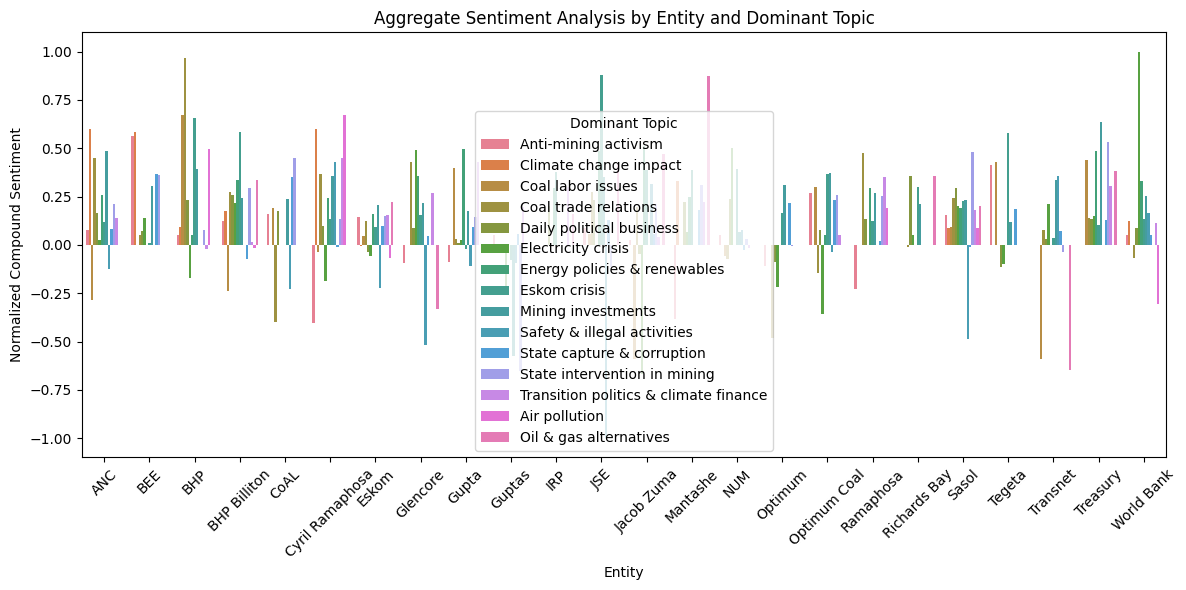

In [ ]:
import pandas as pd
import ast
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')

# Load relevant sentences associated with entities
path_to_relevant_sentences = '/content/drive/MyDrive/Colab Notebooks/relevant_sentences_expanded.csv'
df_relevant_sentences = pd.read_csv(path_to_relevant_sentences)

# Initialize VADER SentimentIntensityAnalyzer
sia = SIA()

# Function to calculate sentiment for each sentence
def calculate_sentiment(sentence):
    pol_score = sia.polarity_scores(sentence)
    return pol_score['compound'], pol_score['pos'], pol_score['neg'], pol_score['neu']

# Apply sentiment analysis to each sentence
sentiment_scores = df_relevant_sentences['Sentence'].apply(calculate_sentiment)
df_relevant_sentences[['Compound', 'Positive', 'Negative', 'Neutral']] = pd.DataFrame(sentiment_scores.tolist())

# Display the updated DataFrame with sentiment scores
print(df_relevant_sentences.head())

# Aggregate sentiment scores by Entity and Dominant Topic
aggregate_sentiment = df_relevant_sentences.groupby(['Entity', 'Dominant Topic']).agg({
    'Compound': 'mean',
    'Positive': 'mean',
    'Negative': 'mean',
    'Neutral': 'mean'
}).reset_index()

# Display aggregated sentiment scores
print(aggregate_sentiment.head())

# Normalize sentiment scores between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))
columns_to_normalize = ['Compound', 'Positive', 'Negative']
aggregate_sentiment[columns_to_normalize] = scaler.fit_transform(aggregate_sentiment[columns_to_normalize])

# Plot aggregate sentiment scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Entity', y='Compound', hue='Dominant Topic', data=aggregate_sentiment)
plt.title('Aggregate Sentiment Analysis by Entity and Dominant Topic')
plt.xlabel('Entity')
plt.ylabel('Normalized Compound Sentiment')
plt.xticks(rotation=45)
plt.legend(title='Dominant Topic')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import nltk
nltk.download('vader_lexicon')

# Load relevant sentences associated with entities
path_to_relevant_sentences = '/content/drive/MyDrive/Colab Notebooks/relevant_sentences_expanded.csv'
df_relevant_sentences = pd.read_csv(path_to_relevant_sentences)
df_relevant_sentences = df_relevant_sentences[df_relevant_sentences['Year'] <= 2023]

# Initialize VADER SentimentIntensityAnalyzer
sia = SIA()

# Function to calculate sentiment for each sentence
def calculate_sentiment(sentence):
    pol_score = sia.polarity_scores(sentence)
    return pol_score['compound']

# Apply sentiment analysis to each sentence
df_relevant_sentences['Compound'] = df_relevant_sentences['Sentence'].apply(calculate_sentiment)

# Aggregate sentiment scores by Entity and Dominant Topic
aggregate_sentiment = df_relevant_sentences.groupby(['Dominant Topic', 'Year']).agg({
    'Compound': 'mean'
}).reset_index()

# Filter for the "Transition" dominant topic
aggregate_sentiment_transition = aggregate_sentiment[aggregate_sentiment['Dominant Topic'] == 'Transition politics & climate finance']

# Normalize sentiment scores between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))
aggregate_sentiment['Normalized Compound'] = scaler.fit_transform(aggregate_sentiment_transition[['Compound']])

# Plot aggregate sentiment scores for "Transition" topic
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Normalized Compound', data=aggregate_sentiment_transition)
plt.title('Aggregate Sentiment Analysis for "Transition politics & climate finance" Topic by Year')
plt.xlabel('Year')
plt.ylabel('Normalized Compound Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


ValueError: Length of values (14) does not match length of index (205)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-40-ba588aa72786>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregate_sentiment_transition['Normalized Compound'] = scaler.fit_transform(


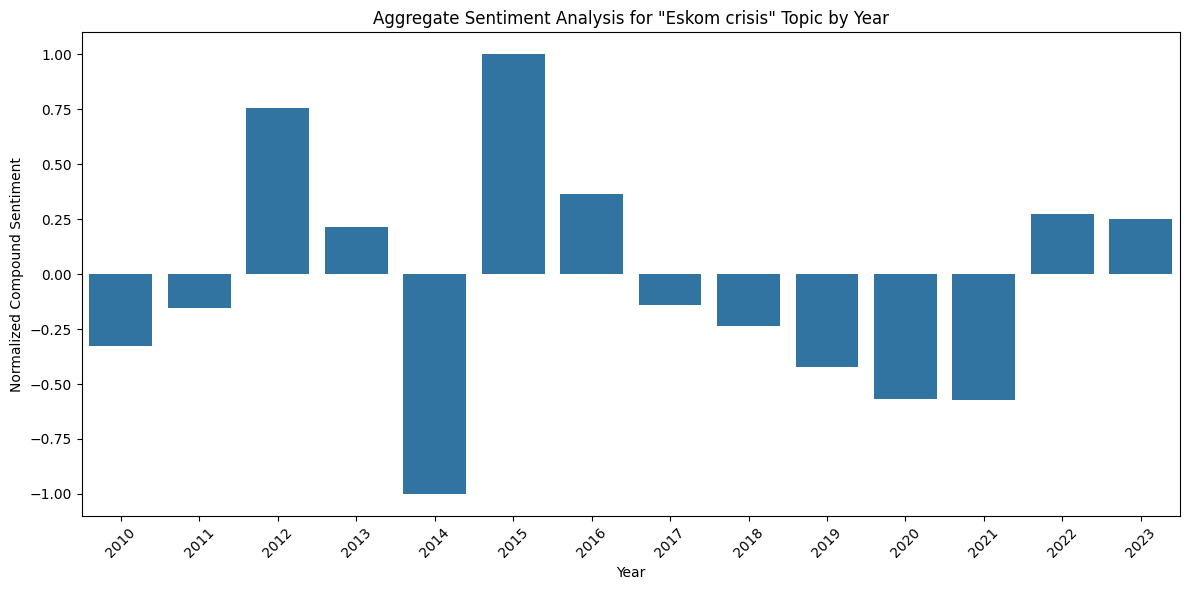

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import nltk
nltk.download('vader_lexicon')

# Load relevant sentences associated with entities
path_to_relevant_sentences = '/content/drive/MyDrive/Colab Notebooks/relevant_sentences_expanded.csv'
df_relevant_sentences = pd.read_csv(path_to_relevant_sentences)

# Initialize VADER SentimentIntensityAnalyzer
sia = SIA()

# Function to calculate sentiment for each sentence
def calculate_sentiment(sentence):
    pol_score = sia.polarity_scores(sentence)
    return pol_score['compound']

# Apply sentiment analysis to each sentence
df_relevant_sentences['Compound'] = df_relevant_sentences['Sentence'].apply(calculate_sentiment)

# Aggregate sentiment scores by Entity and Dominant Topic
aggregate_sentiment = df_relevant_sentences.groupby(['Year', 'Dominant Topic']).agg({
    'Compound': 'mean'
}).reset_index()

# Filter for the "Transition" dominant topic
aggregate_sentiment_transition = aggregate_sentiment[aggregate_sentiment['Dominant Topic'] == 'Eskom crisis']

# Normalize sentiment scores between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))
# Ensure to reshape the data for scaler.fit_transform() to work correctly
aggregate_sentiment_transition['Normalized Compound'] = scaler.fit_transform(
    aggregate_sentiment_transition[['Compound']].values.reshape(-1, 1)
)

# Plot aggregate sentiment scores for "Transition" topic
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Normalized Compound', data=aggregate_sentiment_transition)
plt.title('Aggregate Sentiment Analysis for "Eskom crisis" Topic by Year')
plt.xlabel('Year')
plt.ylabel('Normalized Compound Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


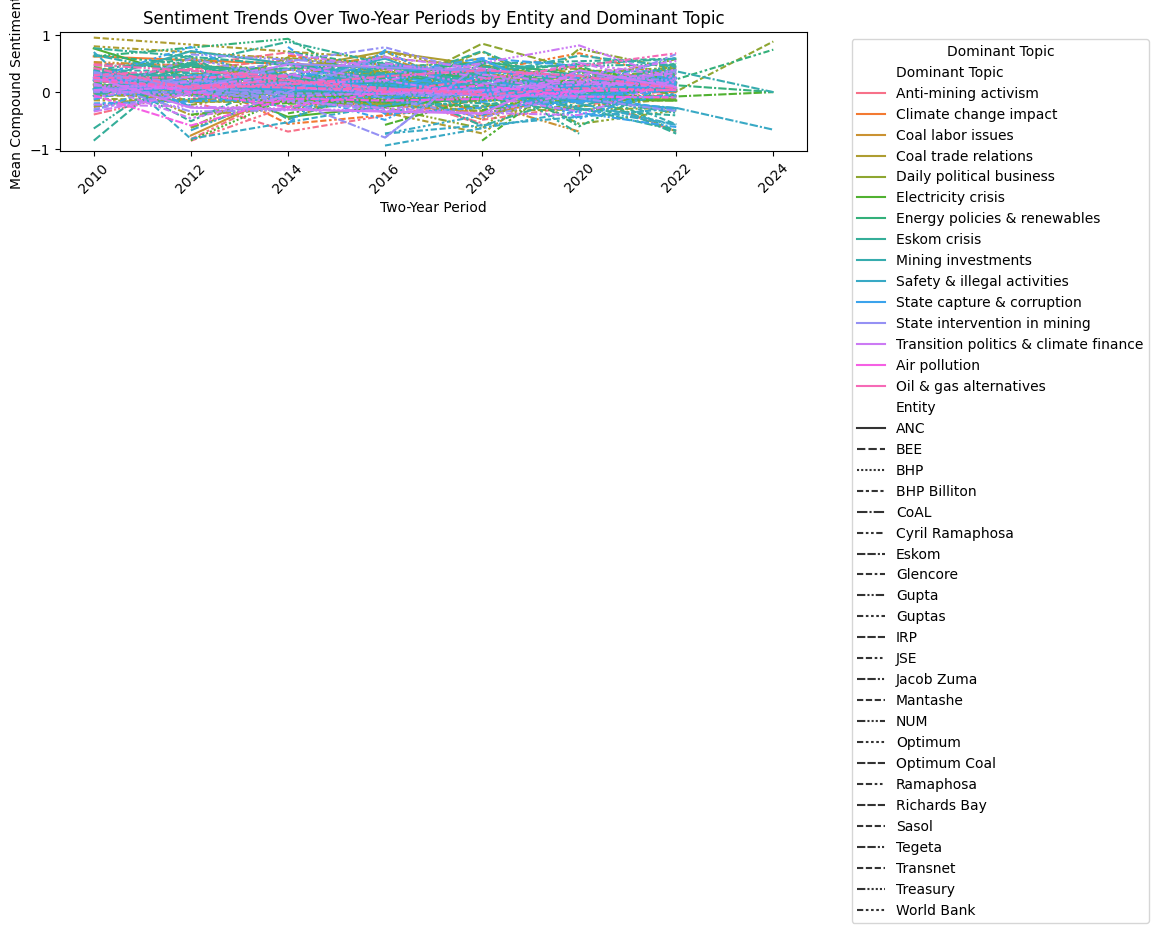

In [ ]:
# Convert 'Year' column to datetime if it's not already
df_relevant_sentences['Year'] = pd.to_datetime(df_relevant_sentences['Year'], format='%Y')

# Aggregate sentiment scores by Entity, Dominant Topic, and two-year periods
df_relevant_sentences['Two-Year Period'] = df_relevant_sentences['Year'].dt.year // 2 * 2
aggregate_sentiment_periods = df_relevant_sentences.groupby(['Entity', 'Dominant Topic', 'Two-Year Period']).agg({
    'Compound': 'mean'
}).reset_index()

# Plot sentiment trends over two-year periods
plt.figure(figsize=(12, 6))
sns.lineplot(x='Two-Year Period', y='Compound', hue='Dominant Topic', style='Entity', data=aggregate_sentiment_periods)
plt.title('Sentiment Trends Over Two-Year Periods by Entity and Dominant Topic')
plt.xlabel('Two-Year Period')
plt.ylabel('Mean Compound Sentiment')
plt.xticks(rotation=45)
plt.legend(title='Dominant Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


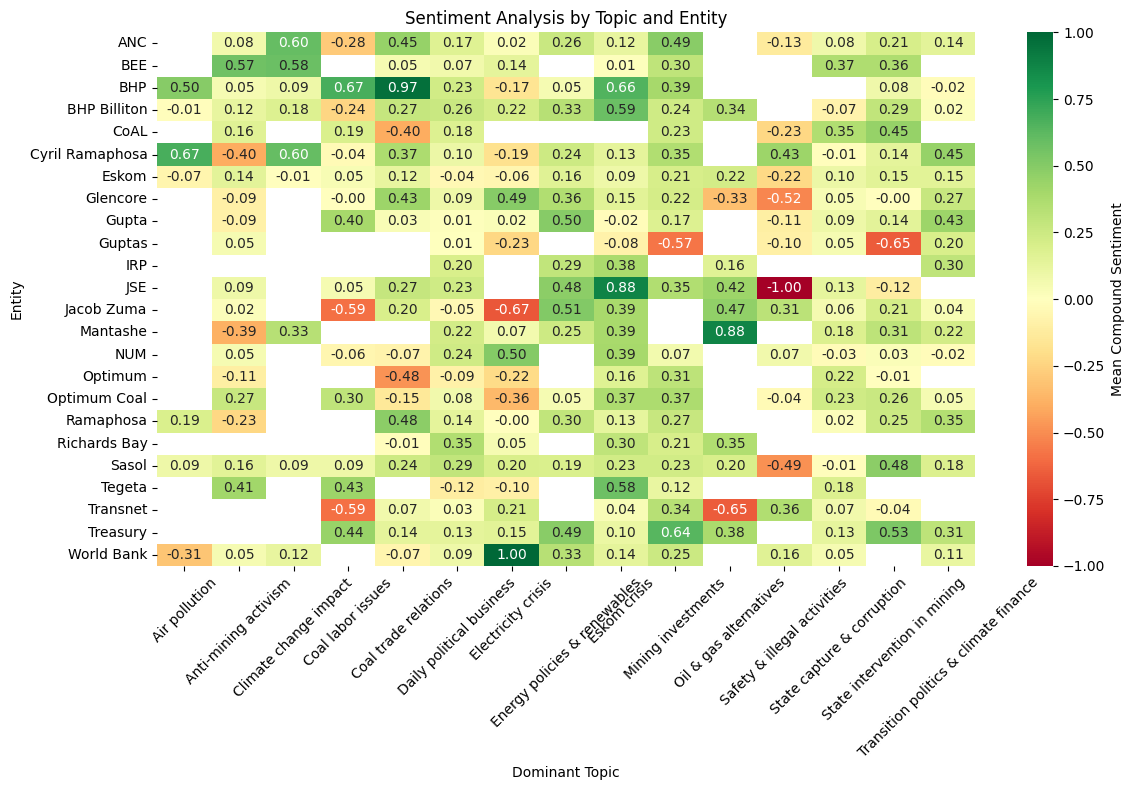

In [ ]:
# Pivot table to get mean compound sentiment by Entity and Dominant Topic
sentiment_pivot = aggregate_sentiment.pivot(index='Entity', columns='Dominant Topic', values='Compound')

# Plot heatmap for sentiment analysis by topic and entity
plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_pivot, cmap='RdYlGn', annot=True, fmt=".2f", cbar_kws={'label': 'Mean Compound Sentiment'})
plt.title('Sentiment Analysis by Topic and Entity')
plt.xlabel('Dominant Topic')
plt.ylabel('Entity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


  Dominant Topic  Three-Year Period  Compound
0  Air pollution               2010  0.069465
1  Air pollution               2013 -0.236267
2  Air pollution               2016 -0.112147
3  Air pollution               2019 -0.013185
4  Air pollution               2022  0.009427


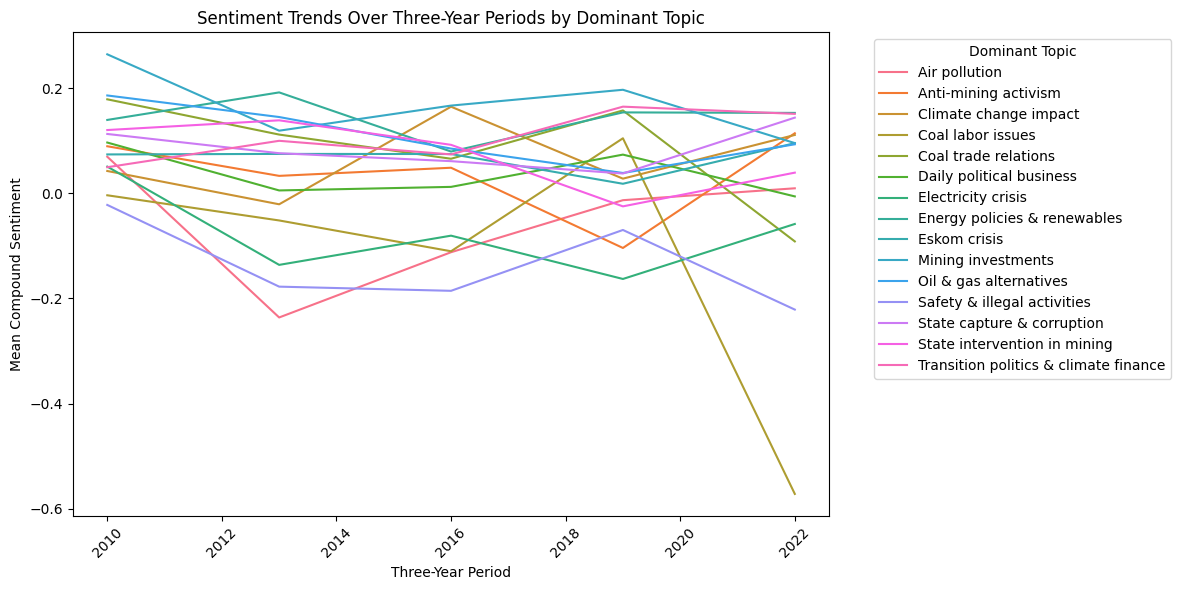

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_relevant_sentences contains relevant data with columns: 'Year', 'Dominant Topic', 'Compound'

# Convert 'Year' column to datetime if it's not already
df_relevant_sentences['Year'] = pd.to_datetime(df_relevant_sentences['Year'], format='%Y')

# Aggregate sentiment scores by Dominant Topic and three-year periods
df_relevant_sentences['Three-Year Period'] = df_relevant_sentences['Year'].dt.year // 3 * 3
aggregate_sentiment_periods = df_relevant_sentences.groupby(['Dominant Topic', 'Three-Year Period']).agg({
    'Compound': 'mean'
}).reset_index()

# Display aggregated sentiment scores
print(aggregate_sentiment_periods.head())

# Plot sentiment trends over three-year periods
plt.figure(figsize=(12, 6))
sns.lineplot(x='Three-Year Period', y='Compound', hue='Dominant Topic', data=aggregate_sentiment_periods)
plt.title('Sentiment Trends Over Three-Year Periods by Dominant Topic')
plt.xlabel('Three-Year Period')
plt.ylabel('Mean Compound Sentiment')
plt.xticks(rotation=45)
plt.legend(title='Dominant Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


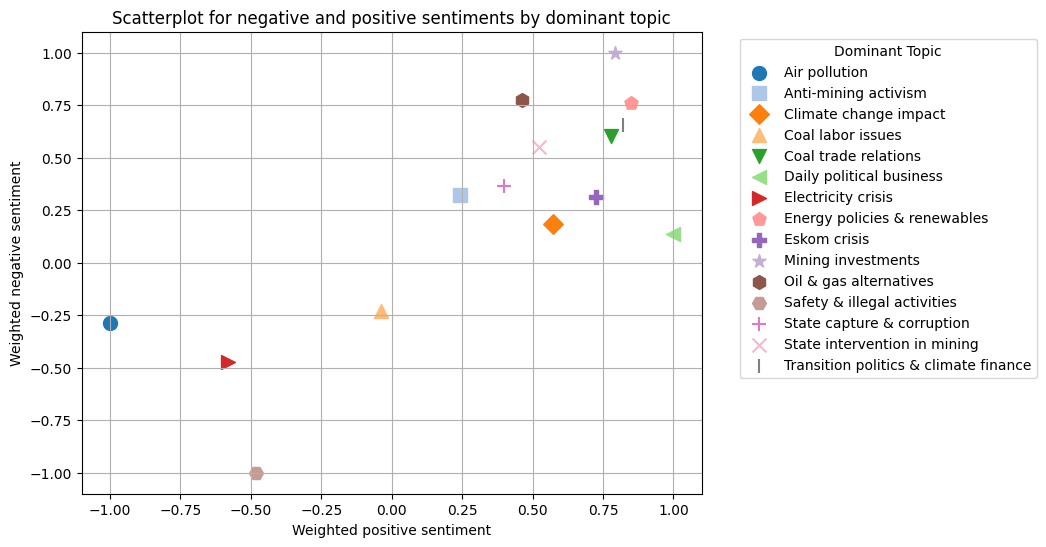

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')

# Load relevant sentences associated with entities
path_to_relevant_sentences = '/content/drive/MyDrive/Colab Notebooks/relevant_sentences_expanded.csv'
df_relevant_sentences = pd.read_csv(path_to_relevant_sentences)

# Initialize VADER SentimentIntensityAnalyzer
sia = SIA()

# Function to calculate sentiment for each sentence
def calculate_sentiment(sentence):
    pol_score = sia.polarity_scores(sentence)
    return pol_score['compound'], pol_score['pos'], pol_score['neg'], pol_score['neu']

# Apply sentiment analysis to each sentence
sentiment_scores = df_relevant_sentences['Sentence'].apply(calculate_sentiment)
df_relevant_sentences[['Compound', 'Positive', 'Negative', 'Neutral']] = pd.DataFrame(sentiment_scores.tolist())

# Aggregate sentiment scores by Dominant Topic
aggregate_sentiment = df_relevant_sentences.groupby('Dominant Topic').agg({
    'Compound': 'mean',
    'Positive': 'mean',
    'Negative': 'mean',
    'Neutral': 'mean'
}).reset_index()

# Normalize sentiment scores between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))
columns_to_normalize = ['Compound', 'Positive', 'Negative']
aggregate_sentiment[columns_to_normalize] = scaler.fit_transform(aggregate_sentiment[columns_to_normalize])

# Set up a colormap with 15 distinct colors (adjust as needed)
colors = plt.cm.tab20.colors  # You can use other colormaps as per your preference

# Create an array of marker styles for distinguishing between different topics
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'P', '*', 'h', 'H', '+', 'x', '|']

# Set up the plot
plt.figure(figsize=(8, 6))

# Iterate over each topic label
for i, (index, row) in enumerate(aggregate_sentiment.iterrows()):
    topic_label = row['Dominant Topic']
    plt.scatter(row['Positive'], row['Compound'], label=topic_label, s=100,
                color=colors[i], marker=markers[i % len(markers)])

# Set plot limits and labels
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('Weighted positive sentiment')
plt.ylabel('Weighted negative sentiment')

# Show a legend with the topic labels
plt.legend(title='Dominant Topic', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set plot title
plt.title('Scatterplot for negative and positive sentiments by dominant topic')

# Show the plot
plt.grid(True)
plt.show()
